# Homework 4 (100 points)

## Exercise 1 (45 pts)

Note: you may only use methods that are imported for you.

In [144]:
import numpy as np
import matplotlib.pyplot as plt

a) Generate and plot 20 (x, y) samples where x and y are exactly linearly related. (1pt)

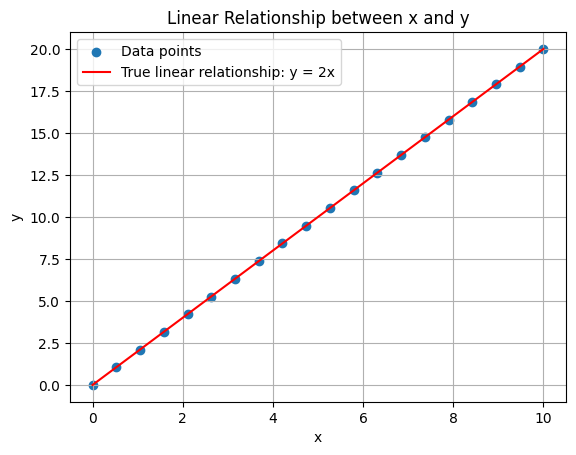

In [145]:
# Generate 20 samples of x values
x = np.linspace(0, 10, 20)

# Generate corresponding y values (linear relationship: y = 2x + random noise)
y = 2 * x   # Adding random noise

# Plotting the data
plt.scatter(x, y, label='Data points')
plt.plot(x, 2 * x, color='red', label='True linear relationship: y = 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Relationship between x and y')
plt.legend()
plt.grid(True)
plt.show()



b) Generate and plot 20 (x, y) samples where x and y follow the assumptions from linear regression (i.e. they are linearly related but there is a $\mathcal{N}(0, \sigma^2)$ error around that linear relationship) (1pt)

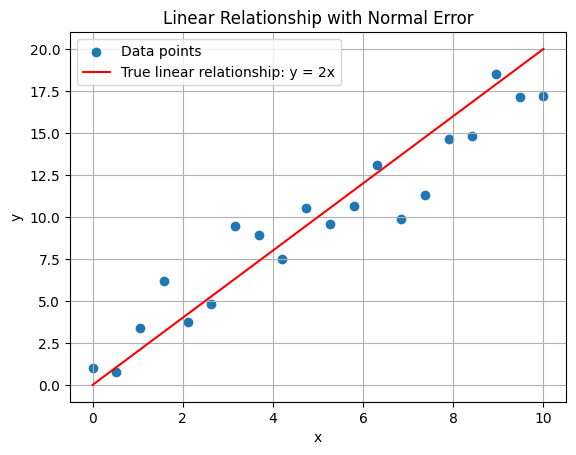

In [146]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate 20 samples of x values
x = np.linspace(0, 10, 20)

# Generate corresponding y values with a linear relationship and normal error
true_relationship = 2 * x  # True linear relationship: y = 2x
error = np.random.randn(20) * 2  # Normally distributed error with mean 0 and standard deviation 2
y = true_relationship + error

# Plotting the data
plt.scatter(x, y, label='Data points')
plt.plot(x, true_relationship, color='red', label='True linear relationship: y = 2x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Relationship with Normal Error')
plt.legend()
plt.grid(True)
plt.show()


c) Generate and plot 20 (x, y) samples where x and y are not related. (1pt)

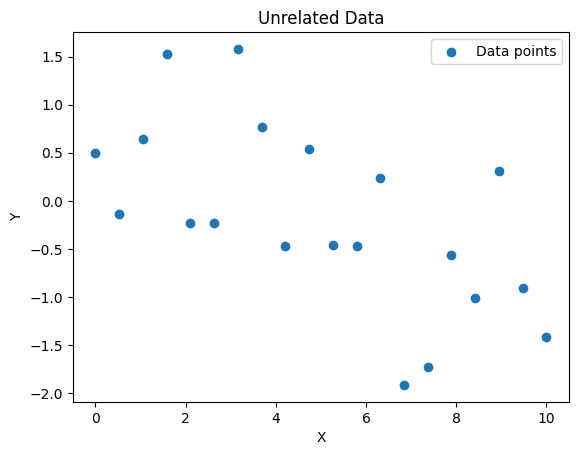

In [147]:
np.random.seed(42)
x = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
y = np.random.normal(0, 1, 20)  # Generate y values with random noise

# Plot the data
plt.scatter(x, y, label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unrelated Data')
plt.legend()
plt.show()

d) Generate and plot 20 (x, y) samples where x and y are not related but there is a $\mathcal{N}(0, \sigma^2)$ error around that relationship. (1pt)

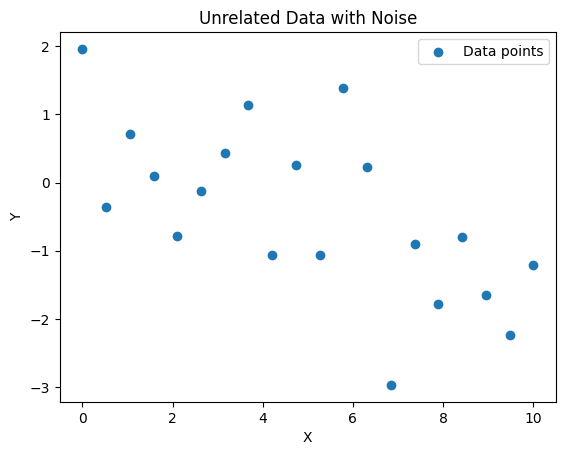

In [149]:
np.random.seed(42)
x_d = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
sigma = 1  # Standard deviation of the normal distribution (error)
noise_d = np.random.normal(0, sigma, 20)  # Generate normally distributed noise

# Generate y values without any relation to x, with noise
y_d = np.random.normal(0, 1, 20) + noise_d

# Plot the data
plt.scatter(x_d, y_d, label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unrelated Data with Noise')
plt.legend()
plt.show()

e) Plot the least squares estimated line through the scatter plot from d). How different are the estimated intercept and slope from the true parameters you chose? (2pt)

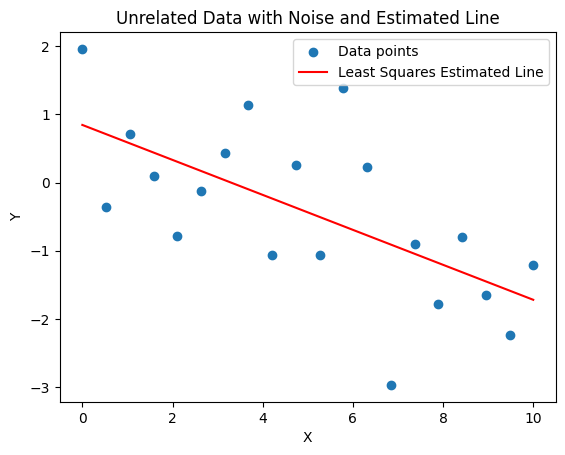

True Slope: 0, Estimated Slope: -0.25674401017468396
True Intercept: 0, Estimated Intercept: 0.8464463740375411


In [152]:
x_mean = np.mean(x_d)
y_mean = np.mean(y_d)

numerator = np.sum((x_d - x_mean) * (y_d - y_mean))
denominator = np.sum((x_d - x_mean) ** 2)

estimated_slope = numerator / denominator
estimated_intercept = y_mean - estimated_slope * x_mean

# Plot the data
plt.scatter(x_d, y_d, label='Data points')
plt.plot(x_d, estimated_slope * x_d + estimated_intercept, color='red', label='Least Squares Estimated Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unrelated Data with Noise and Estimated Line')
plt.legend()
plt.show()

# Print the estimated and true parameters
print(f"True Slope: {0}, Estimated Slope: {estimated_slope}")
print(f"True Intercept: {0}, Estimated Intercept: {estimated_intercept}")


Since we assumed that there is no relationship between X and Y, the true parameters are just 0 (Null hypothesis), the estimated slope is 0.25674401017468396 lesser than the true slope and the estimated intercept is 0.8464463740375411 more than the true intercept.

f) For 10000 trials:

- Generate a random sample as in d)
- Record the estimated intercept and slope

Plot the histogram of the recorded estimated intercepts and slopes. Given what you know about the least squares estimate being the Best Linear Unbiased Estimator (BLUE), comment on the histogram. (4pt)

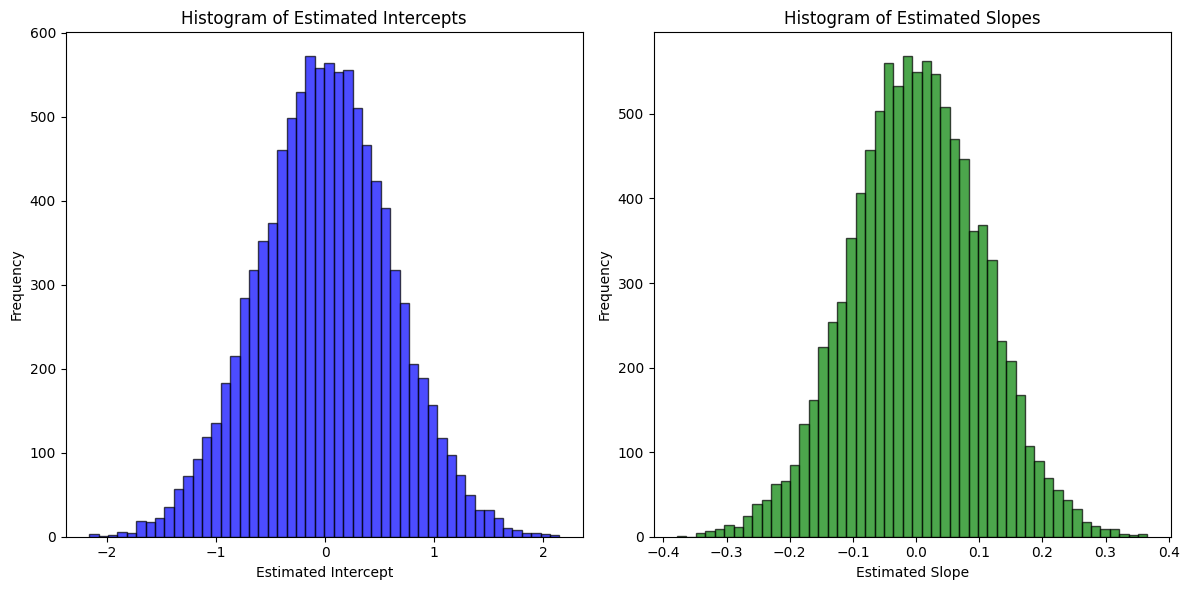

In [123]:
np.random.seed(42)
num_trials = 10000

estimated_intercepts = []
estimated_slopes = []

for _ in range(num_trials):
    # Generate random sample
    x = np.linspace(0, 10, 20)
    sigma = 1
    noise = np.random.normal(0, sigma, 20)
    y = np.random.normal(0, 1, 20) + noise

    # Create the design matrix X
    X = np.column_stack((np.ones_like(x), x))

    # Calculate the coefficients using the analytical solution
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Record estimated intercept and slope
    estimated_intercepts.append(beta[0])
    estimated_slopes.append(beta[1])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(estimated_intercepts, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Estimated Intercepts')
plt.xlabel('Estimated Intercept')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(estimated_slopes, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Estimated Slopes')
plt.xlabel('Estimated Slope')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

g) What proportion of these randomly generated samples resulted in us estimating that the slope greater than 3? (2pt)

In [124]:
estimated_slopes = np.array(estimated_slopes)

# Count of samples where estimated slope is greater than 3
count_greater_than_3 = np.sum(estimated_slopes > 3)

# Calculate the proportion
proportion_greater_than_3 = count_greater_than_3 / len(estimated_slopes)

print(f"Proportion of samples with estimated slope > 3: {proportion_greater_than_3}")

Proportion of samples with estimated slope > 3: 0.0


Consider the following dataset:

In [153]:
X = [-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811]
Y = [ 1.19767097,  0.29995773, -0.64423194,  1.68648628,  1.24942173, -1.16800996, -0.03962662, -0.10352774,  0.20238111, -0.85779092, -0.3192597,  -0.10701115, 0.65195857,  1.56361601, -0.41691836,  1.94918682,  0.16463584,  1.20797826, 1.10575936, -2.11374363]

h) Based on the simulation you conducted above, approximately how likely is it to observe a dataset at least as extreme as this one under the assumption that X and Y are not related? What can you conclude about the true relationship between X and Y in this case? (5pt)

In [126]:
import numpy as np
from scipy.stats import t

# Given X and Y values
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])

# Calculate means of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate numerator and denominators for Pearson correlation coefficient
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator_X = np.sqrt(np.sum((X - mean_X)**2))
denominator_Y = np.sqrt(np.sum((Y - mean_Y)**2))

# Calculate Pearson correlation coefficient
correlation_coefficient = numerator / (denominator_X * denominator_Y)

# Calculate t-statistic and p-value
n = len(X)
degrees_of_freedom = n - 2
t_statistic = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient**2))
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), degrees_of_freedom))

# Set alpha value
alpha = 0.05

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
# Check the p-value against alpha to determine hypothesis result
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant relationship between X and Y.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to claim a significant relationship between X and Y.")


Pearson correlation coefficient: -0.6195163079843455
P-value: 0.003578112094751562
Reject the null hypothesis. There is evidence of a significant relationship between X and Y.


The Pearson correlation coefficient between X and Y is approximately -0.6195, and the associated p-value is approximately 0.0036.

Given a significance level of 0.05 (commonly used in hypothesis testing), the p-value of 0.0036 is less than 0.05. This indicates that there is strong evidence to reject the null hypothesis (H0: no correlation) in favor of the alternative hypothesis (H1: there is a correlation). 

Therefore, based on these results:

1. **Correlation Strength:** The negative correlation coefficient suggests a moderately strong negative linear relationship between variables X and Y.
2. **Statistical Significance:** The obtained p-value (< 0.05) indicates that the observed correlation is statistically significant at a 5% significance level.

In conclusion, there is evidence to support the presence of a significant negative correlation between X and Y in the given dataset.

i) Based on the simulation you conducted above, approximately what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [155]:
slope_quantile = np.percentile(estimated_slopes, 97.5)

print(f"The estimated slope is greater than this value only 2.5% of the time: {slope_quantile}")

The estimated slope is greater than this value only 2.5% of the time: 0.20400033245316052


j) Recall, we know that, provided the assumptions from linear regression hold:

$$\hat\beta \sim \mathcal{N}(\beta,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$

$$\hat\beta_k \sim \mathcal{N}(\beta_k, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Run a simulation to verify that this is the case. Plot both the histogram and distribution function for the slope and intercepts. (5pt)

**Find an approximate $\beta$ to use.**

In [176]:
# Assuming you have defined Y and X (dependent and independent variables) as arrays or Series

# Given data
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])

# Add a column of ones to X for the intercept term
X_matrix = np.vstack([np.ones(len(X)), X]).T

# Fit linear regression model
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y


true_intercept = beta_hat[0]
true_slope = beta_hat[1]

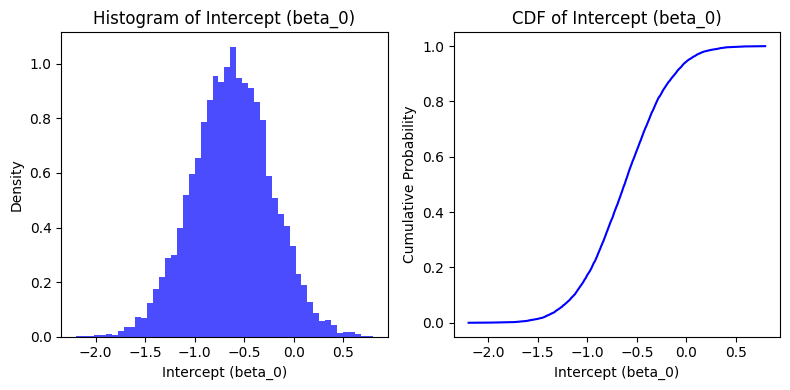

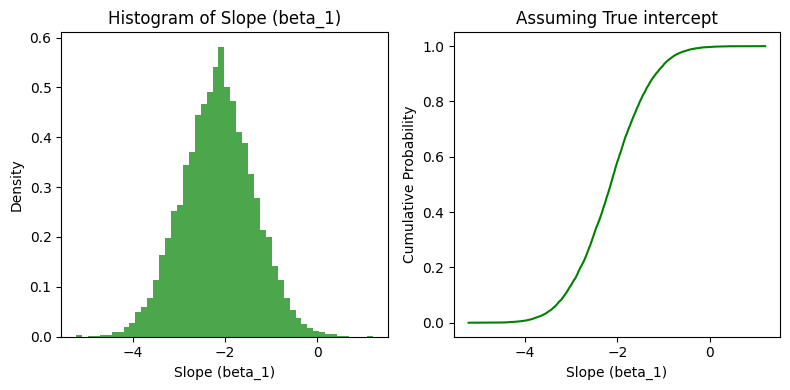

In [177]:
from scipy.stats import norm
np.random.seed(42)
# Given data
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])

# Add a column of ones to X for the intercept term
X_matrix = np.vstack([np.ones(len(X)), X]).T

# Number of simulations
num_simulations = 10000

# Lists to store simulated slope and intercept values
beta_0_simulations = []
beta_1_simulations = []

# Simulate linear regression parameters
for _ in range(num_simulations):
    # Generate random errors assuming normal distribution
    errors = np.random.normal(0, np.std(Y), len(Y))
    
    # Simulate response variable Y_hat
    Y_hat = np.dot(X_matrix, [true_intercept, true_slope]) + errors
    
    # Fit linear regression model
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_hat
    
    # Store simulated slope and intercept values
    beta_0_simulations.append(beta_hat[0])
    beta_1_simulations.append(beta_hat[1])

# Plot histogram and distribution function for intercept (beta_0)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(beta_0_simulations, bins=50, density=True, color='blue', alpha=0.7, label='Histogram')
plt.title('Histogram of Intercept (beta_0)')
plt.xlabel('Intercept (beta_0)')
plt.ylabel('Density')

# Plot CDF for intercept (beta_0)
sorted_beta_0_simulations = np.sort(beta_0_simulations)
cdf_beta_0 = np.arange(1, len(sorted_beta_0_simulations) + 1) / len(sorted_beta_0_simulations)
plt.subplot(1, 2, 2)
plt.plot(sorted_beta_0_simulations, cdf_beta_0, color='blue', label='CDF')
plt.title('CDF of Intercept (beta_0)')
plt.xlabel('Intercept (beta_0)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

# Plot histogram and distribution function for slope (beta_1)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(beta_1_simulations, bins=50, density=True, color='green', alpha=0.7, label='Histogram')
plt.title('Histogram of Slope (beta_1)')
plt.xlabel('Slope (beta_1)')
plt.ylabel('Density')

# Plot CDF for slope (beta_1)
sorted_beta_1_simulations = np.sort(beta_1_simulations)
cdf_beta_1 = np.arange(1, len(sorted_beta_1_simulations) + 1) / len(sorted_beta_1_simulations)
plt.subplot(1, 2, 2)
plt.plot(sorted_beta_1_simulations, cdf_beta_1, color='green', label='CDF')
plt.title('CDF of Slope (beta_1)')
plt.xlabel('Slope (beta_1)')
plt.ylabel('Cumulative Probability')
plt.title('Assuming True intercept')
plt.tight_layout()
plt.show()

k) Assuming $\beta_k = 0$ and $\sigma^2 = 1$, what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [173]:
import numpy as np
from scipy.stats import norm

# Given data
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])

# Add a column of ones to X for the intercept term
X_matrix = np.vstack([np.ones(len(X)), X]).T

# Compute the inverse of X^T X
inverse_XTX = np.linalg.inv(X_matrix.T @ X_matrix)

# Calculate S11 (variance of the slope estimate)
sigma_squared = 1  # Given sigma squared
S11 = sigma_squared * inverse_XTX[1, 1]  # Element at index (1, 1) of the inverse of X^T X

# Calculate the estimate of the slope that would be greater than only 2.5% of the time
slope_2p5_percentile = norm.ppf(0.975) * np.sqrt(S11)
print(f"The value estimate of the slope is greater than only 2.5% of the time: {slope_2p5_percentile}")


The value estimate of the slope is greater than only 2.5% of the time: 1.4755032488827418


l) Using the dataset from h) and assuming that the variance is known to be 1, report the 95% confidence interval around the estimate of the slope. (4pt)

In [174]:
# Given data
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])

# Add a column of ones to X for the intercept term
X_matrix = np.vstack([np.ones(len(X)), X]).T

# Fit linear regression model
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

# Standard error of the estimate of the slope
se_slope = np.sqrt(np.sum((Y - np.dot(X_matrix, beta_hat))**2) / (len(Y) - 2)) / np.sqrt(np.sum((X - np.mean(X))**2))

# Critical value for a 95% confidence interval
critical_value = norm.ppf(0.975)

# Margin of error
margin_of_error = critical_value * se_slope

# Confidence interval
confidence_interval = (beta_hat[1] - margin_of_error, beta_hat[1] + margin_of_error)

print("95% Confidence Interval for the Slope:", confidence_interval)


95% Confidence Interval for the Slope: (-3.397479215803636, -0.8885991930671275)


m) Compare the quantiles of the sample below with the quantiles from a normal distribution with mean 0.5 and variance 0.8 by plotting the QQ plot (similar to worksheet 20). Comment on whether this sample comes from that distribution. (4pt)

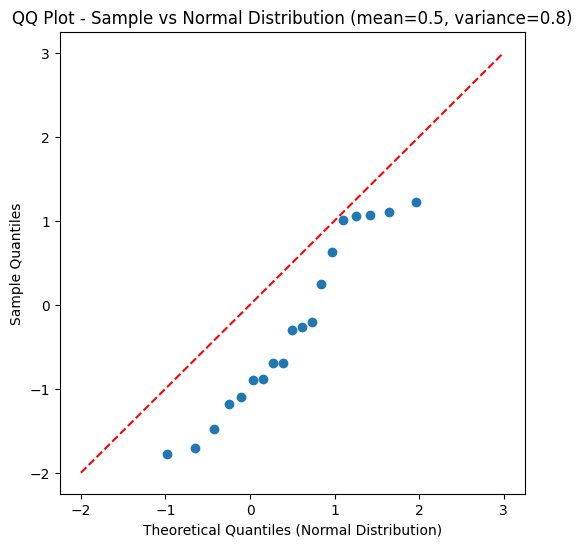

In [178]:
sample = [-0.69432553, -1.18507198, -1.10313529, -0.89965522, -1.77829857,  1.29517858, -0.26577831,  1.22107267, -1.47509329,  1.10836504, -0.69882542, -1.70683313, 1.06283306, -0.29739484,  1.00650644, -0.88249571,  0.24853913, -0.20528149, 1.05585924, 0.6289595]

def theoretical_quantile(q, mu, sigma):
    d = 3
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = norm.cdf(i, mu, sigma)
        if abs(q - val) < delta:
            return round(i, ndigits=d-1)
    ValueError("couldn't find anything")
def sample_quantile(q, sample):
    sorted_sample = np.sort(sample)
    count = 0
    for i in range(len(sorted_sample)):
        count += 1
        if count / len(sample) >= q :
            return sorted_sample[i]
    raise ValueError("unable to find quantile")
NUM_QUANT = len(sample)
quants = [x / NUM_QUANT for x in range(1, NUM_QUANT)]
# Calculate theoretical quantiles from a normal distribution with mean 0.5 and variance 0.8
theoretical_quantiles = [theoretical_quantile(i, 0.5, np.sqrt(0.8)) for i in quants]

# Calculate sample quantiles
sample_quants = [sample_quantile(x, sample) for x in quants]

# Plotting QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sample_quants)
plt.title('QQ Plot - Sample vs Normal Distribution (mean=0.5, variance=0.8)')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles')
plt.plot([-2, 3], [-2, 3], color='red', linestyle='--')  # Identity line

plt.show()



n) Generate a dataset where the $R^2$ is 1.0 and a dataset where the $R^2$ is 0.0 (2pt)

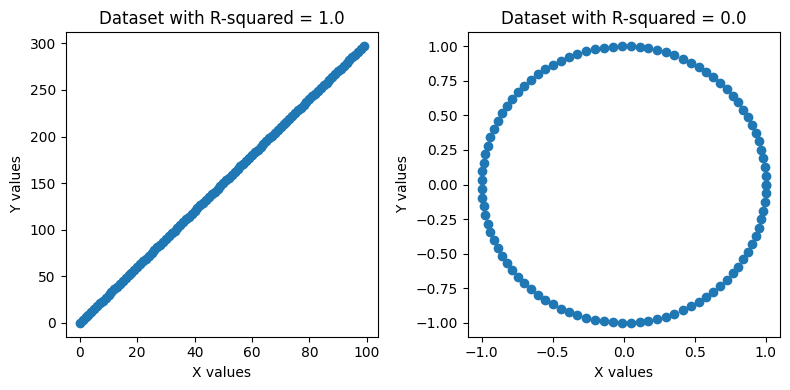

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset with R-squared = 1.0
X_1 = np.arange(100)
Y_1 = 3 * X_1

# Plotting dataset with R-squared = 1.0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_1, Y_1)
plt.title('Dataset with R-squared = 1.0')
plt.xlabel('X values')
plt.ylabel('Y values')

# Dataset with R-squared = 0.0
theta = np.linspace(0, 2 * np.pi, 100)  # Values of theta from 0 to 2pi
radius = 1.0  # Radius of the circle
X_2 = radius * np.cos(theta)  # X values
Y_2 = radius * np.sin(theta)  # Y values

# Plotting dataset with R-squared = 0.0
plt.subplot(1, 2, 2)
plt.scatter(X_2, Y_2)
plt.title('Dataset with R-squared = 0.0')
plt.xlabel('X values')
plt.ylabel('Y values')

# Show plots
plt.tight_layout()
plt.show()


o) Generate a dataset that follows the linear regression assumptions *except* that the variance is not constant. (1pt)

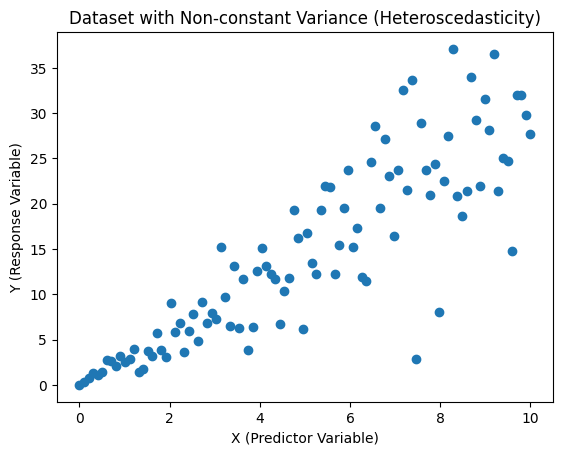

In [180]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Independent variable
X = np.linspace(0, 10, 100)

# Generate random errors with varying standard deviation
errors = X + np.random.normal(0, X, len(X))

# Dependent variable
Y = 2 * X + errors

# Plot the data
plt.scatter(X, Y)
plt.xlabel('X (Predictor Variable)')
plt.ylabel('Y (Response Variable)')
plt.title('Dataset with Non-constant Variance (Heteroscedasticity)')
plt.show()


p) You're playing DnD with your friends but you suspect that one of your friends is using a weighted d20 die because they always seem to roll successfully. You decide to record their die rolls to evaluate this hypothesis. You record the following:

```
1 : 0 times
2 : 1 times
3 : 2 times
4 : 1 times
5 : 4 times
6 : 1 times
7 : 1 times
8 : 0 times
9 : 0 times
10 : 1 times
11 : 1 times
12 : 2 times
13 : 2 times
14 : 3 times
15 : 1 times
16 : 1 times
17 : 1 times
18 : 2 times
19 : 3 times
20 : 3 times
```

Compute the exact probability of observing something at least as extreme as the above dataset under the hypothesis that the d20 die is fair. What can you conclude? (6pts)

In [181]:
# Observed frequencies
observed_frequencies = np.array([0, 1, 2, 1, 4, 1, 1, 0, 0, 1, 1, 2, 2, 3, 1, 1, 1, 2, 3, 3])

# Total number of rolls
total_rolls = np.sum(observed_frequencies)

# Expected frequencies under the assumption of a fair die
expected_frequencies = np.ones_like(observed_frequencies) * (total_rolls / 20)

# Calculate the chi-squared test statistic
chi2_stat = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)

# Degrees of freedom (number of categories - 1)
degrees_of_freedom = len(observed_frequencies) - 1

# p-value using the chi-squared distribution
from scipy.stats import chi2
p_value = 1 - chi2.cdf(chi2_stat, degrees_of_freedom)

print("Chi-squared test statistic:", chi2_stat)
print("P-value:", p_value)


Chi-squared test statistic: 15.333333333333332
P-value: 0.7011891237238881


The p-value obtained from the chi-square test is 0.7012. This p-value represents the probability of observing a result as extreme as, or more extreme than, the observed data, assuming that the d20 die is fair. 

If the p-value is high (typically greater than the significance level, often chosen as 0.05), it suggests that the observed data is not significantly different from what would be expected from a fair die. In this case, with a p-value of 0.7012, which is much higher than the common significance level of 0.05, there is insufficient evidence to reject the hypothesis that the die is fair. Therefore, based on the results of the chi-square test, we cannot conclude that the die is weighted or biased.

## Exercise 2 (55 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-fall-2023-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Crispiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

In [182]:
import pandas as pd
df_train = pd.read_csv("cookie_train.csv")
df_test = pd.read_csv("cookie_test.csv")

### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together which won't cause any issues.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Crispiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

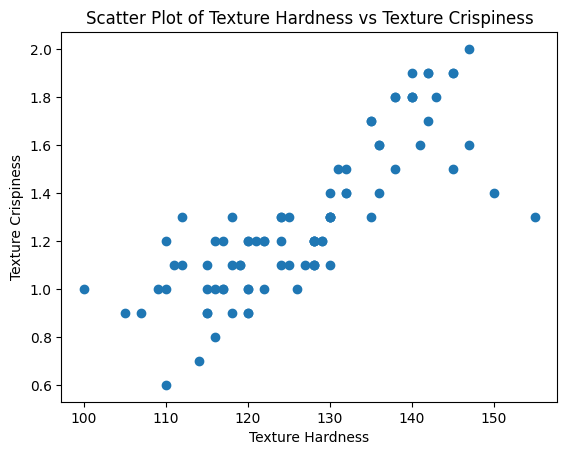

In [183]:
cookie_data = pd.concat([df_train, df_test], ignore_index=True)
# Plot the scatter plot
plt.scatter(cookie_data['Texture Hardness'], cookie_data['Texture Crispiness'])
plt.title('Scatter Plot of Texture Hardness vs Texture Crispiness')
plt.xlabel('Texture Hardness')
plt.ylabel('Texture Crispiness')
plt.show()

### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in finding optimal estimators given limited information, check out the course CAS MA 582. GRS MA 781/782 are also fun!).


**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the normality assumption. State whether if the normality assumption is met or not. If it is not met, state what can we do to fix this.

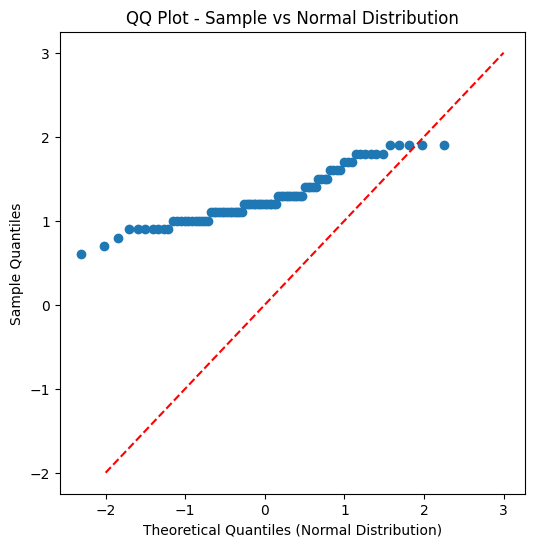

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
X = cookie_data['Texture Hardness']
Y = cookie_data['Texture Crispiness']

def theoretical_quantile(q, mu, sigma):
    d = 3
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = norm.cdf(i, mu, sigma)
        if abs(q - val) < delta:
            return round(i, ndigits=d-1)
    ValueError("couldn't find anything")
def sample_quantile(q, sample):
    sorted_sample = np.sort(sample)
    count = 0
    for i in range(len(sorted_sample)):
        count += 1
        if count / len(sample) >= q :
            return sorted_sample[i]
    raise ValueError("unable to find quantile")
NUM_QUANT = len(Y)
quants = [x / NUM_QUANT for x in range(1, NUM_QUANT)]
# Calculate theoretical quantiles from a normal distribution with mean 0.5 and variance 0.8
theoretical_quantiles = [theoretical_quantile(i, 0, 1) for i in quants]

# Calculate sample quantiles
sample_quants = [sample_quantile(x, Y.values) for x in quants]

# Plotting QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sample_quants)
plt.title('QQ Plot - Sample vs Normal Distribution')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles')
plt.plot([-2, 3], [-2, 3], color='red', linestyle='--')  # Identity line

plt.show()

_(Written response goes in this cell)_

#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the model isn't really best fit with a line.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the homoscedasticity assumption. State whether if the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

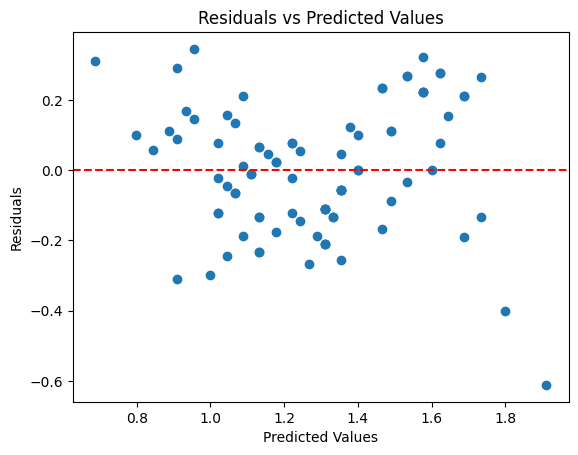

In [185]:
import statsmodels.api as sm
# Assuming you have already defined X and Y
X = cookie_data['Texture Hardness']
Y = cookie_data['Texture Crispiness']

# Add a constant to X for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Get predicted values and residuals
predicted_values = model.predict(X)
residuals = model.resid

# Plot residuals vs predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

_(Written response goes in this cell)_

#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

In [186]:
import statsmodels.api as sm

# Assuming you have already defined X and Y
X = cookie_data['Texture Hardness']
Y = cookie_data['Texture Crispiness']

# Add a constant to X for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Calculate Durbin-Watson statistic
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

print("Durbin-Watson Statistic:", durbin_watson_statistic)
# Interpret the results
if 1.5 < durbin_watson_statistic < 2.5:
    print('The independence assumption is likely met.')
else:
    print('The independence assumption may not be met.')

Durbin-Watson Statistic: 2.3531435624642723
The independence assumption is likely met.


A Durbin-Watson statistic of 2.3531435624642723 falls within the range indicating little to no autocorrelation. It suggests that the residuals (errors) from the regression model do not exhibit strong autocorrelation, which is a favorable condition as it implies that the model's assumptions related to independence of errors might hold reasonably well.

#### Adjusting the Model
If you think any of the assumptions are not met, then you should respectively fix the model.

**f) (6 Points)** If you think atleast one of the assumptions were not met, then adjust the model how you described you would. Otherwise, proceed to the next step and in the cell below, write "No adjustments were made to the model". However, if you do adjust the model, then in the cell below, justify why your adjustments is appropriate (i.e. plot the new graphs and statistics found above). You may add as many cells as you like.

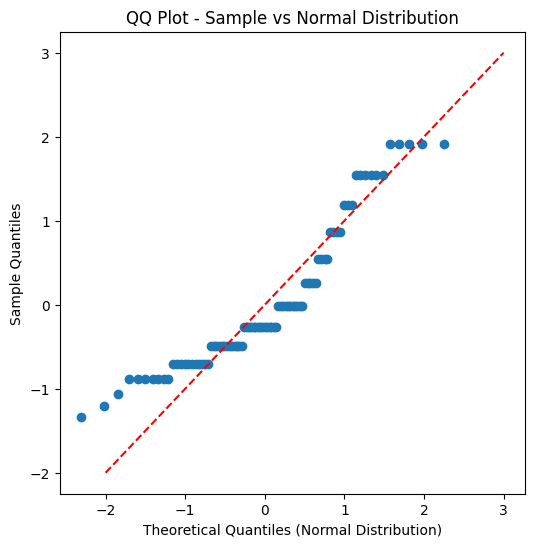

In [187]:
X_log = cookie_data['Texture Hardness']
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7


def theoretical_quantile(q, mu, sigma):
    d = 3
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = norm.cdf(i, mu, sigma)
        if abs(q - val) < delta:
            return round(i, ndigits=d-1)
    ValueError("couldn't find anything")
def sample_quantile(q, sample):
    sorted_sample = np.sort(sample)
    count = 0
    for i in range(len(sorted_sample)):
        count += 1
        if count / len(sample) >= q :
            return sorted_sample[i]
    raise ValueError("unable to find quantile")
NUM_QUANT = len(Y_log)
quants = [x / NUM_QUANT for x in range(1, NUM_QUANT)]
# Calculate theoretical quantiles from a normal distribution with mean 0.5 and variance 0.8
theoretical_quantiles = [theoretical_quantile(i, 0, 1) for i in quants]

# Calculate sample quantiles
sample_quants = [sample_quantile(x, Y_log.values) for x in quants]

# Plotting QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sample_quants)
plt.title('QQ Plot - Sample vs Normal Distribution')
plt.xlabel('Theoretical Quantiles (Normal Distribution)')
plt.ylabel('Sample Quantiles')
plt.plot([-2, 3], [-2, 3], color='red', linestyle='--')  # Identity line

plt.show()

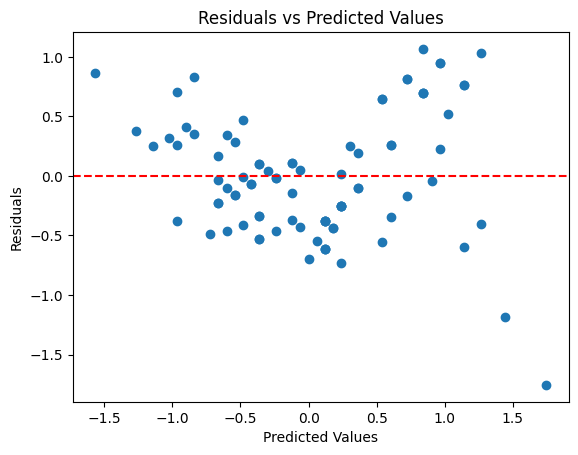

In [189]:
X_log = cookie_data['Texture Hardness']
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7
# Add a constant to X for the intercept term
X_log = sm.add_constant(X_log)

# Fit the linear regression model
model_transformed = sm.OLS(Y_log, X_log).fit()

# Get predicted values and residuals
predicted_values = model_transformed.predict(X_log)
residuals = model_transformed.resid

# Plot residuals vs predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

In [104]:
# Calculate Durbin-Watson statistic
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model_transformed.resid)

print("Durbin-Watson Statistic:", durbin_watson_statistic)
# Interpret the results
if 1.5 < durbin_watson_statistic < 2.5:
    print('The independence assumption is likely met.')
else:
    print('The independence assumption may not be met.')

Durbin-Watson Statistic: 2.3813108636360814
The independence assumption is likely met.


A Durbin-Watson statistic of 2.3813108636360814 falls within the range indicating little to no autocorrelation. It suggests that the residuals (errors) from the regression model do not exhibit strong autocorrelation, which is a favorable condition as it implies that the model's assumptions related to independence of errors might hold reasonably well.

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (6 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Crispiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

In [190]:
print(model_transformed.summary())


                            OLS Regression Results                            
Dep. Variable:     Texture Crispiness   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.25e-20
Time:                        22:12:57   Log-Likelihood:                -67.482
No. Observations:                  88   AIC:                             139.0
Df Residuals:                      86   BIC:                             143.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5832      0.623  

A p-value of 0.00 suggests strong evidence against the null hypothesis that the coefficient of the explanatory variable Texture Hardness is equal to zero. In statistical terms, this implies that Texture Hardness is a statistically significant predictor of the response variable Texture Crispiness.

Therefore, at the alpha significance level of 0.05, we reject the null hypothesis ($\beta_{hardness} = 0$) in favor of the alternative hypothesis ($\beta_{hardness} \neq 0$). This indicates that there is a significant linear relationship between Texture Hardness and Texture Crispiness.

### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Color L*` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (8 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Color L*` are significant predictors of the response variable `Texture Crispiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You will use the transformed model made (if one was made) from the previous parts and add this new feature to it._

In [191]:
import statsmodels.api as sm

# Assuming X contains 'Texture Hardness', 'Color L*', and other predictors
X_log = cookie_data[['Texture Hardness', 'Color L*']]
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7

# Add a constant for the intercept
X_log = sm.add_constant(X_log)

# Fit the multiple linear regression model
model = sm.OLS(Y_log, X_log).fit()

print(model.summary())
print(model.f_test("Texture Hardness = 0, Color L* = 0"))


                            OLS Regression Results                            
Dep. Variable:     Texture Crispiness   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     242.7
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           7.27e-36
Time:                        22:16:37   Log-Likelihood:                -28.320
No. Observations:                  88   AIC:                             62.64
Df Residuals:                      85   BIC:                             70.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -13.1383      0.644  

The p-value associated with Texture Hardness is 0.014, which is greater than the significance level of $\alpha = 0.001$. Therefore, at this stringent significance level, Texture Hardness would not be considered statistically significant. However, it is worth noting that a p-value of 0.014 is still less than the conventional threshold of 0.05 (for $\alpha = 0.05$), implying some evidence against the null hypothesis.

The p-value associated with Color L* is essentially zero (0.0). This extremely low p-value provides strong evidence against the null hypothesis and indicates that Color L* is a highly statistically significant predictor of Texture Crispiness.

The F-test for the overall model has an F-statistic of 242.7 with a p-value of approximately 7.27e-36 (which is essentially zero). This low p-value indicates strong evidence against the null hypothesis that all coefficients (excluding the intercept) are zero. Hence, the overall model is considered statistically significant at the 0.001 significance level.

### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (8 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

Certainly! The coefficients in a multiple linear regression model indicate the relationship between the predictors (`Texture Hardness` and `Color L*`) and the response variable (`Texture Crispiness`). Let's interpret the coefficients:

### Interpretation of Coefficients:

#### Constant (Intercept):
- `const` coefficient: -13.1383
  - This represents the estimated `Texture Crispiness` when both `Texture Hardness` and `Color L*` are zero.
  - In practical terms, it might not have a real-world interpretation since having both predictors as zero might not be feasible or meaningful in the context of your data.

#### Texture Hardness:
- `Texture Hardness` coefficient: -0.0199
  - For every one-unit increase in `Texture Hardness`, holding other variables constant, `Texture Crispiness` is estimated to decrease by approximately 0.0199 units.
  - However, this effect might not be statistically significant at the very stringent significance level of $\alpha = 0.001$, but it does show some evidence of a negative relationship with `Texture Crispiness`.

#### Color L*:
- `Color L*` coefficient: 0.1955
  - For every one-unit increase in `Color L*`, holding other variables constant, `Texture Crispiness` is estimated to increase by approximately 0.1955 units.
  - This effect is statistically significant (p-value of 0.0), indicating a strong positive relationship between `Color L*` and `Texture Crispiness`.

### Conclusion:

- The intercept (`const`) represents the estimated `Texture Crispiness` when all predictors are zero, which might not have a practical interpretation in this context.
  
- `Color L*` shows a strong positive relationship with `Texture Crispiness`, suggesting that changes in `Color L*` are associated with significant changes in `Texture Crispiness`.

- `Texture Hardness` has a negative coefficient, indicating a negative relationship with `Texture Crispiness`, but its significance might not hold at the very strict significance level given.

### Considerations:

- Always consider the context and domain-specific knowledge to interpret the coefficients correctly.
  
- While `Texture Hardness` might not be statistically significant at a stringent level, its effect size or practical significance might still be relevant and worth considering in the broader context of your analysis.

- Additional analyses, domain knowledge, or further model refinement might help in understanding and explaining the relationship between predictors and the response variable more comprehensively.

In [ ]:
#Your code in this cell if you need it

### Using Color b* over Color L*
You think that the feature `Color b*` can help improve your model even better instead of using `Color L*`.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Crispiness`.

**j) (8 Points)** Plot 2 scatter plots: `Color b*` vs your possibly adjusted `Texture Crispiness` and `Color b*` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.

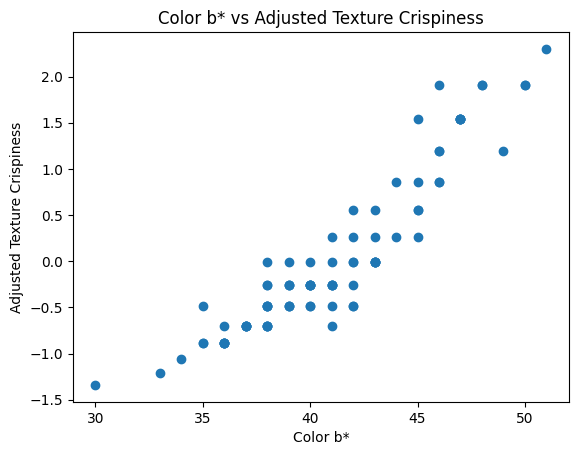

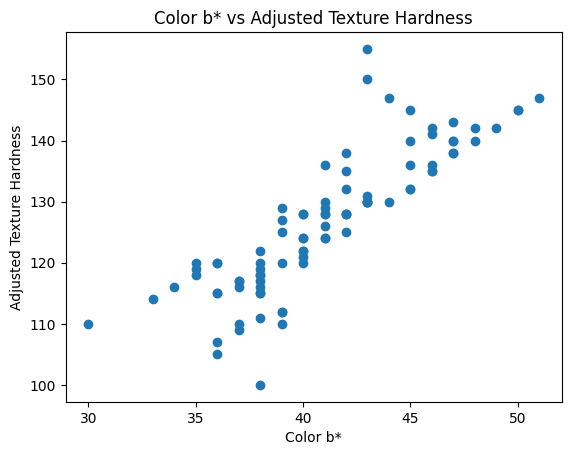

In [192]:
import matplotlib.pyplot as plt

X_log = cookie_data[['Texture Hardness', 'Color L*']]
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7

# Plot Color b* vs Adjusted Texture Crispiness
plt.scatter(cookie_data['Color b*'], Y_log)
plt.xlabel('Color b*')
plt.ylabel('Adjusted Texture Crispiness')
plt.title('Color b* vs Adjusted Texture Crispiness')
plt.show()

# Plot Color b* vs Adjusted Texture Hardness
plt.scatter(cookie_data['Color b*'], X_log['Texture Hardness'])
plt.xlabel('Color b*')
plt.ylabel('Adjusted Texture Hardness')
plt.title('Color b* vs Adjusted Texture Hardness')
plt.show()


In [200]:
import numpy as np
X_log = cookie_data[['Texture Hardness', 'Color b*']]
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7

X_log = sm.add_constant(X_log)
# Fit the multiple linear regression model
model_final = sm.OLS(Y_log, X_log).fit()

# Calculate R-squared values
r_squared = model_final.rsquared

print(f"R-squared for Texture Crispiness model: {r_squared}")

print(model_final.summary())


R-squared for Texture Crispiness model: 0.8557303134258092
                            OLS Regression Results                            
Dep. Variable:     Texture Crispiness   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.84e-36
Time:                        22:33:11   Log-Likelihood:                -26.898
No. Observations:                  88   AIC:                             59.80
Df Residuals:                      85   BIC:                             67.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

As we can see from the above plots, there is multicollinearity between Texture Hardness and Color b*. It is better to drop Texture Hardness as the p-value is also significantly high (0.508). We can fit the model again without it. 

In [194]:
from sklearn.metrics import mean_squared_error

# Predicted values from the model
predicted_values = model_final.predict(X_log)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_log, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.10789947743555618
Root Mean Squared Error (RMSE): 0.32848055868735393


c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

In [201]:
import numpy as np
X_log = cookie_data[['Color b*']]
Y_log = np.square(cookie_data['Texture Crispiness']) - 1.7

X_log = sm.add_constant(X_log)
# Fit the multiple linear regression model
model_final = sm.OLS(Y_log, X_log).fit()

# Calculate R-squared values
r_squared = model_final.rsquared

print(f"R-squared for Texture Crispiness model: {r_squared}")

print(model_final.summary())

from sklearn.metrics import mean_squared_error

# Predicted values from the model
predicted_values = model_final.predict(X_log)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_log, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



R-squared for Texture Crispiness model: 0.8549791060452508
                            OLS Regression Results                            
Dep. Variable:     Texture Crispiness   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     507.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           8.09e-38
Time:                        22:35:52   Log-Likelihood:                -27.127
No. Observations:                  88   AIC:                             58.25
Df Residuals:                      86   BIC:                             63.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ketan\anaconda3\envs\ai\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt